In [ ]:
import  tensorflow as tf
import matplotlib.pyplot as plt
%run "Fashion_Classify.ipynb"


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
print("\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs = 5)
test_l, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"test set accuracy: {test_acc}")
print(f"test set loss: {test_l}")





MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4338 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2912 - accuracy: 0.8937
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2476 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2180 - accuracy: 0.9189
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1889 - accuracy: 0.9286
test set accuracy: 0.9028000235557556
test set loss: 0.26579749584198


In [18]:
print(f"First 90 labels:\n\n {test_labels[: 90]}")
print(f"\nFashion Item: {[i for i in range(90) if test_labels[:90][i]== 6]}")

First 90 labels:

 [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6]

Fashion Item: [4, 7, 26, 40, 44, 73, 89]


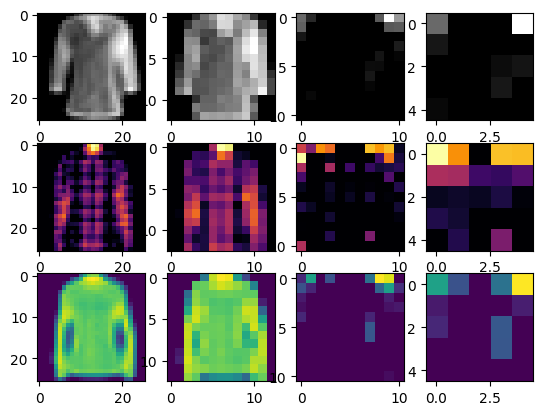

In [24]:
#thử trích coi lớp đầu ra của conv2D và maxpooling2D

FIRST_IMAGE =4
SECOND_IMAGE = 7
LAST_IMAGE = 26 #trích các chỉ số ở dãy trên
CONVOLUTION_NUM = 1 #cái này là chỉ số của bộ filter số 1

layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D] #lớp cần vsualize
#check trong các lớp cái nào là cái mk cần thì lấy
layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3, len(layer_outputs))

for x in range(len(layer_outputs)):
    f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=0)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUM], cmap='gray')

    f2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=0)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUM], cmap='inferno')

    f3=activation_model.predict(test_images[LAST_IMAGE].reshape(1, 28, 28, 1), verbose=0)[x]
    axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUM], cmap='viridis')